<a href="https://colab.research.google.com/github/AFSAL-HANEEFA/Ecommerce_django_project/blob/master/Heart_disease_prediction_machine__learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import pandas to read the raw data csv file to a dataframe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


 1. Data Capture and Initial Analysis

In [ ]:
#Reading dataset
heart_disease_data = pd.read_csv("/content/heart.csv")

In [ ]:
#printing first 5 row of raw dataset
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#print the last 5 row of raw dataset
heart_disease_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
#To understand the data type of coloum data
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:

heart_disease_data.isnull().sum()/len(heart_disease_data)*100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [ ]:
heart_disease_data.duplicated().sum()

723

In [ ]:
heart_disease_data.drop_duplicates(inplace=True)

In [ ]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_disease_data.target.value_counts()

1    164
0    138
Name: target, dtype: int64

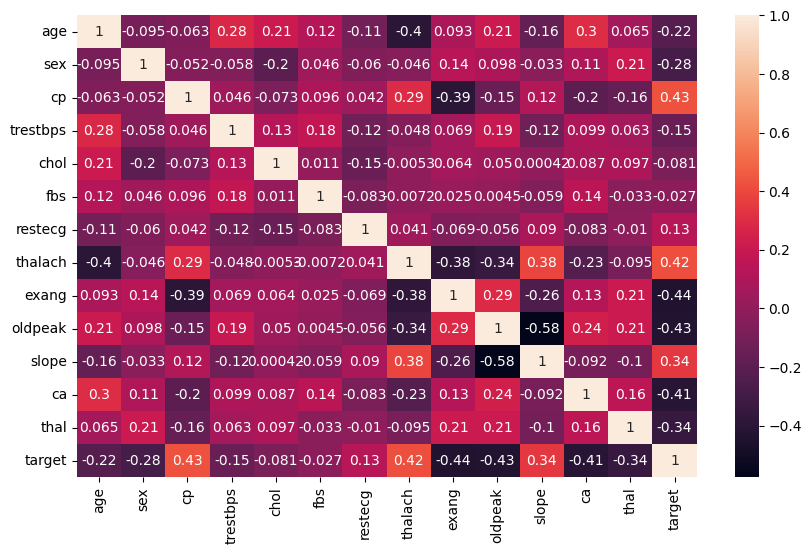

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(heart_disease_data.corr(),annot=True)
plt.show()


In [ ]:
heart_disease_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
heart_disease_data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

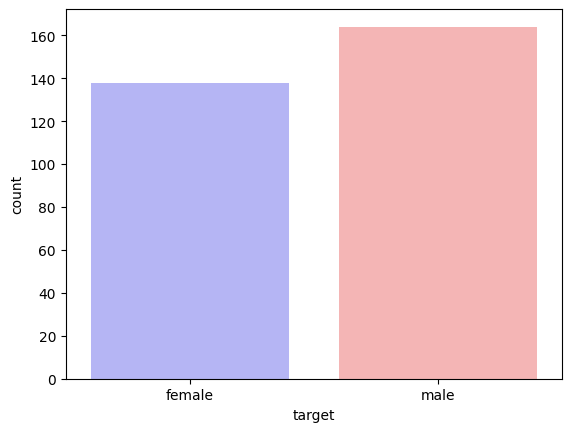

In [ ]:
sns.countplot(x="target", data=heart_disease_data, palette="bwr")

plt.xticks([0,1],["female","male"])
plt.show()

In [ ]:
countNoDisease = len(heart_disease_data[heart_disease_data.target == 0])
countHaveDisease = len(heart_disease_data[heart_disease_data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(heart_disease_data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart_disease_data.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.70%
Percentage of Patients Have Heart Disease: 54.30%


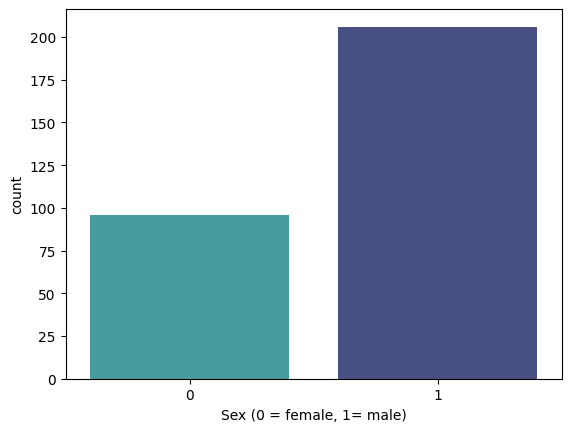

In [ ]:
sns.countplot(x='sex', data=heart_disease_data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

<Axes: xlabel='thal', ylabel='count'>

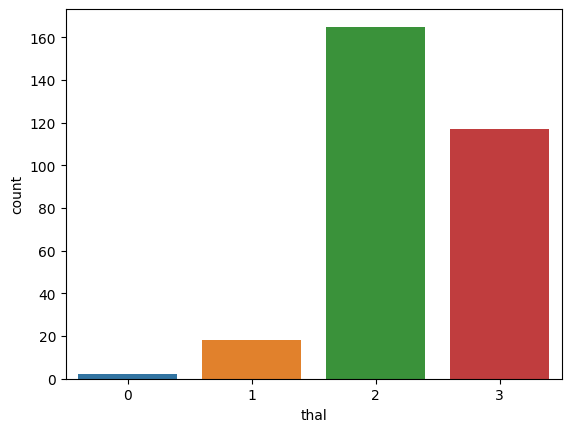

In [ ]:
sns.countplot(x="thal",data=heart_disease_data)

In [ ]:
countFemale = len(heart_disease_data[heart_disease_data.sex == 0])
countMale = len(heart_disease_data[heart_disease_data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(heart_disease_data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(heart_disease_data.sex))*100)))

Percentage of Female Patients: 31.79%
Percentage of Male Patients: 68.21%


In [ ]:
heart_disease_data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


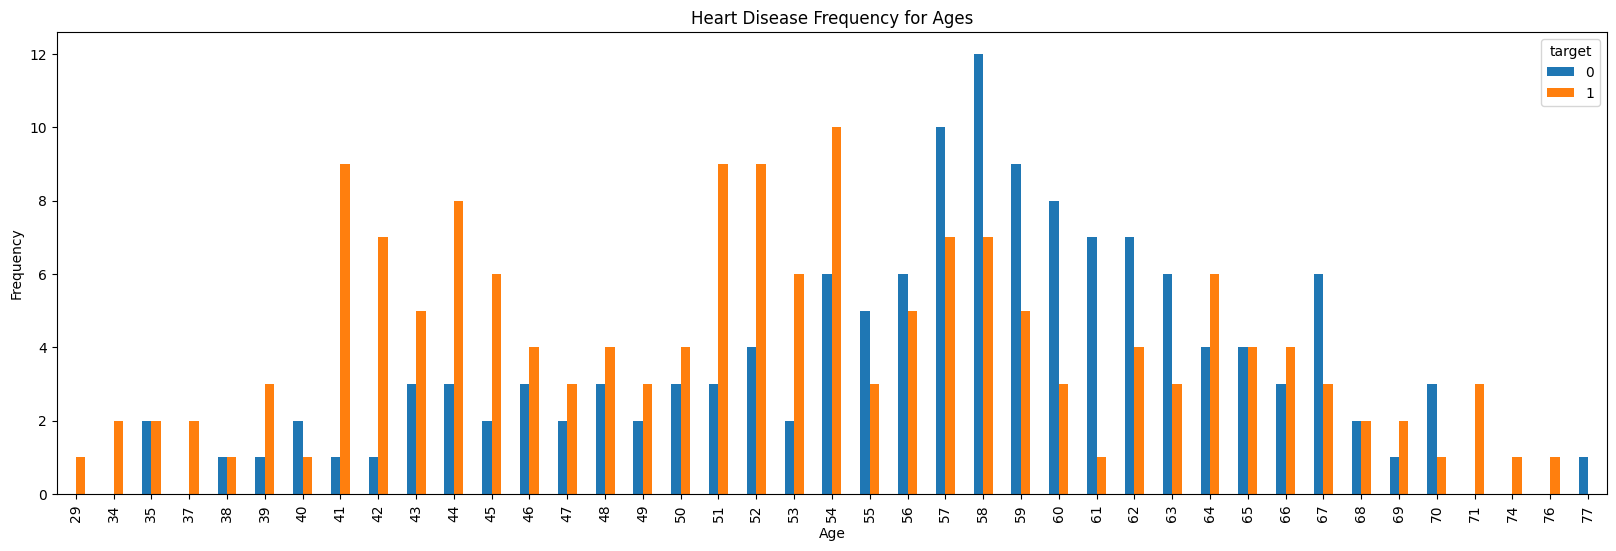

In [ ]:
pd.crosstab(heart_disease_data.age,heart_disease_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

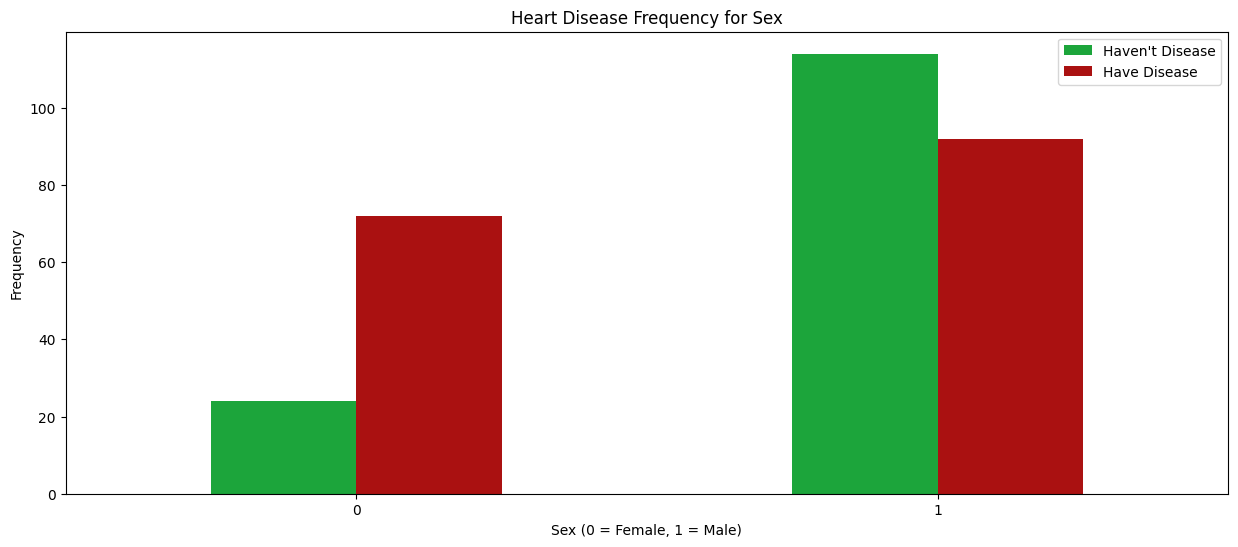

In [ ]:
pd.crosstab(heart_disease_data.sex,heart_disease_data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

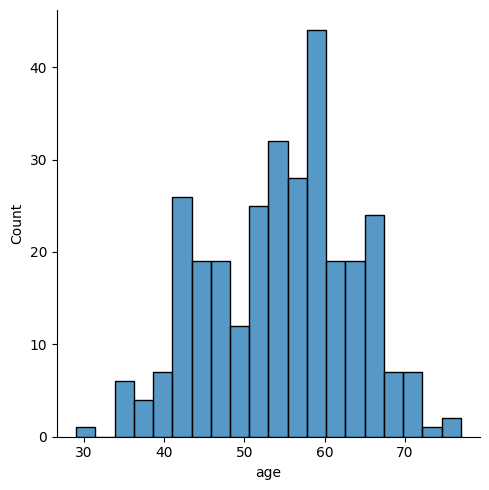

In [ ]:
sns.displot(heart_disease_data['age'],bins=20)
plt.show

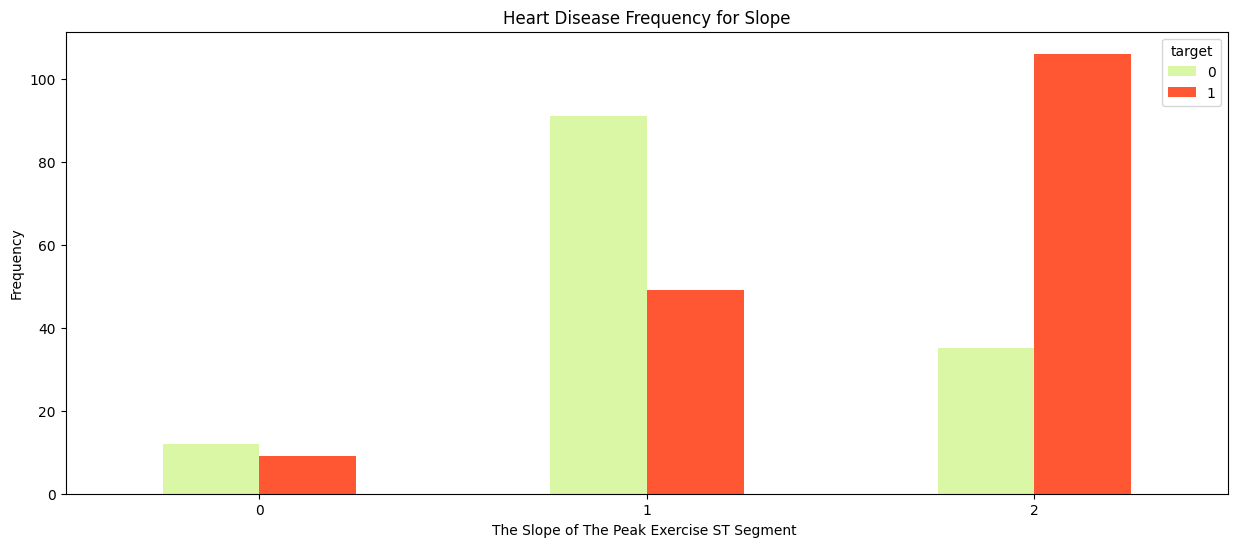

In [ ]:
pd.crosstab(heart_disease_data.slope,heart_disease_data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

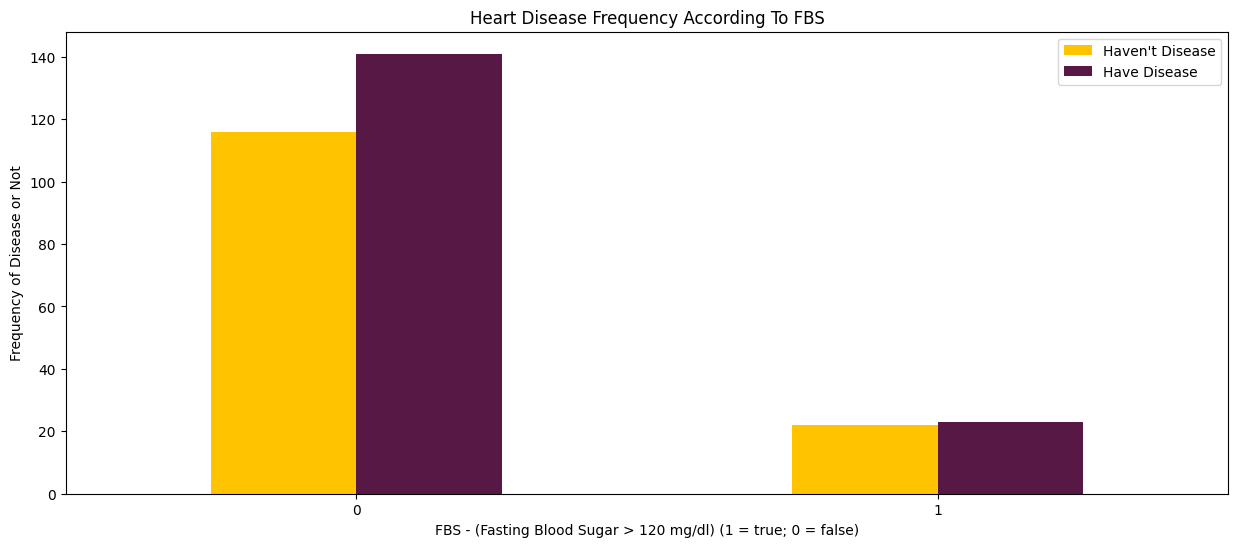

In [ ]:
pd.crosstab(heart_disease_data.fbs,heart_disease_data.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

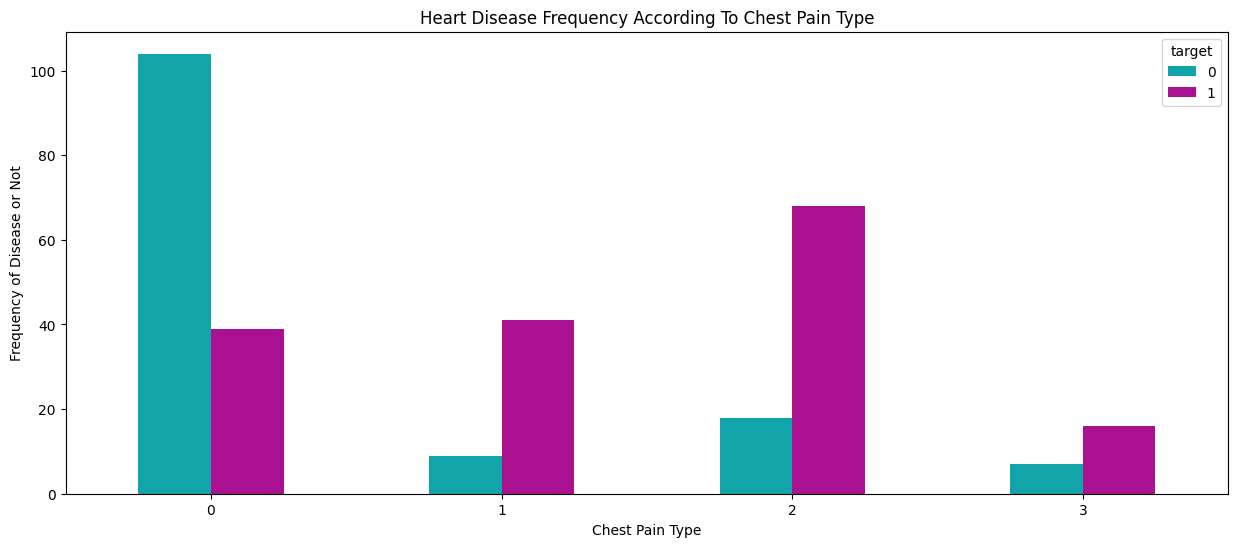

In [ ]:
pd.crosstab(heart_disease_data.cp,heart_disease_data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

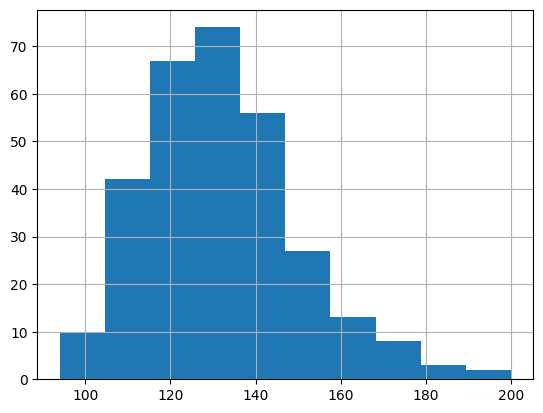

In [ ]:
heart_disease_data[ 'trestbps'].hist()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


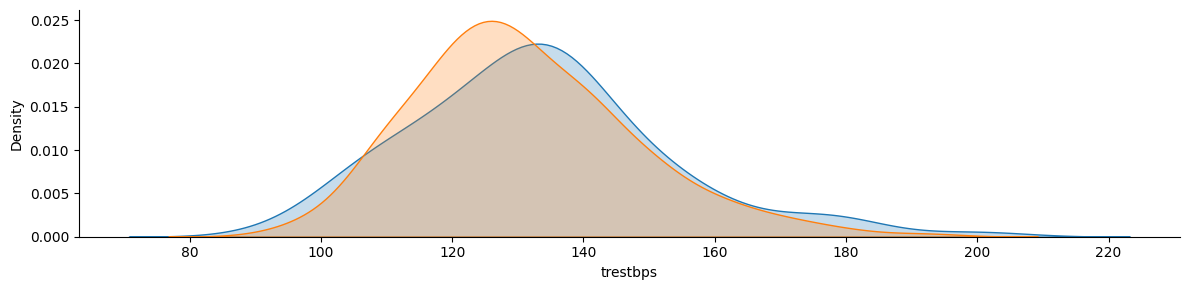

In [ ]:

g = sns.FacetGrid(heart_disease_data, hue='sex', aspect=4)
g.map (sns.kdeplot,'trestbps',shade=True)


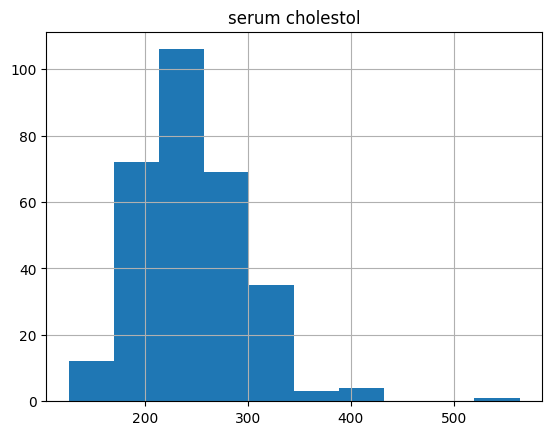

In [ ]:
heart_disease_data['chol'].hist()
plt.title('serum cholestol')

plt.show()

In [ ]:
cp = pd.get_dummies(heart_disease_data['cp'], prefix="cp")
thal = pd.get_dummies(heart_disease_data['thal'], prefix="thal")
slope = pd.get_dummies(heart_disease_data['slope'], prefix="slope")

In [ ]:
data= [heart_disease_data, cp, thal, slope]
heart_disease_data = pd.concat(data, axis=1)
heart_disease_data = heart_disease_data.drop(columns=['cp', 'thal', 'slope'])
heart_disease_data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,0,0,115,0,1.5,0,...,0,1,0,0,0,1,0,0,1,0
733,44,0,108,141,0,1,175,0,0.6,0,...,0,1,0,0,0,1,0,0,1,0
739,52,1,128,255,0,1,161,1,0.0,1,...,0,0,0,0,0,0,1,0,0,1
843,59,1,160,273,0,0,125,0,0.0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
X = heart_disease_data.drop(['target'], axis=1)
y = heart_disease_data.target.values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(226, 21) (76, 21) (226,) (76,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
pred = knn.  predict(X_test)

print("k-NN train score : {:.4f}".format(knn.score(X_train, y_train)))
print("k-NN test score : {:.4f}".format(knn.score(X_test, y_test)))

k-NN train score : 0.8628
k-NN test score : 0.7895


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

print("Logistic Regression train score : {:.4f}".format(logreg.score(X_train, y_train)))
print("Logistic Regression test score : {:.4f}".format(logreg.score(X_test, y_test)))

Logistic Regression train score : 0.8673
Logistic Regression test score : 0.7895


In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=0)
svm.fit(X_train, y_train)

print("SVM train score : {:.4f}".format(svm.score(X_train, y_train)))
print("SVM test score : {:.4f}".format(svm.score(X_test, y_test)))

SVM train score : 0.9159
SVM test score : 0.7500


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

print("Naive Bayes train score : {:.4f}".format(nb.score(X_train, y_train)))
print("Naive Bayes test score : {:.4f}".format(nb.score(X_test, y_test)))

Naive Bayes train score : 0.7345
Naive Bayes test score : 0.7105


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=6, random_state=3)
tree.fit(X_train, y_train)


print("Decision Tree train score : {:.4f}".format(tree.score(X_train, y_train)))
print("Decision Tree test score : {:.4f}".format(tree.score(X_test, y_test)))

Decision Tree train score : 0.9690
Decision Tree test score : 0.7368


In [ ]:
print("k-NN test score : {:.4f}".format(knn.score(X_test, y_test)))
print("Logistic Regression test score : {:.4f}".format(logreg.score(X_test, y_test)))
print("SVM test score : {:.4f}".format(svm.score(X_test, y_test)))
print("Naive Bayes test score : {:.4f}".format(nb.score(X_test,y_test)))
print("Decision Tree test score {:.4f}".format(tree.score(X_test, y_test)))

k-NN test score : 0.7895
Logistic Regression test score : 0.7895
SVM test score : 0.7500
Naive Bayes test score : 0.7105
Decision Tree test score 0.7368


In [ ]:
pred_knn = knn.predict(X_test)
pred_logreg = logreg.predict(X_test)
pred_svm = svm.predict(X_test)
pred_nb = nb.predict(X_test)
pred_tree = tree.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, pred_knn)
cm_logreg = confusion_matrix(y_test, pred_logreg)
cm_svm = confusion_matrix(y_test, pred_svm)
cm_nb = confusion_matrix(y_test, pred_nb)
cm_tree = confusion_matrix(y_test, pred_tree)

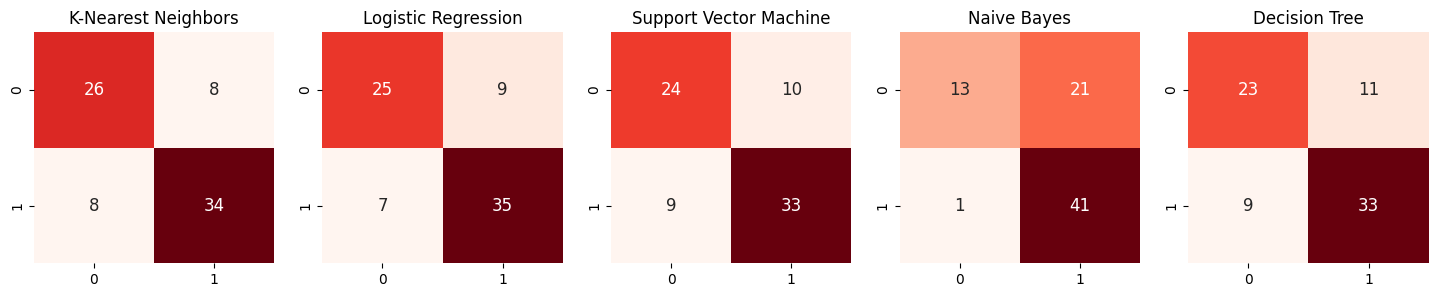

In [ ]:
plt.figure(figsize=(18,3))

plt.subplot(1,5,1)
plt.title("K-Nearest Neighbors")
sns.heatmap(cm_knn, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 12})

plt.subplot(1,5,2)
plt.title("Logistic Regression")
sns.heatmap(cm_logreg, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 12})

plt.subplot(1,5,3)
plt.title("Support Vector Machine")
sns.heatmap(cm_svm, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 12})

plt.subplot(1,5,4)
plt.title("Naive Bayes")
sns.heatmap(cm_nb, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 12})

plt.subplot(1,5,5)
plt.title("Decision Tree")
sns.heatmap(cm_tree, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 12})

plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("k-NN")
print('------------------------------------------------------------------')
print(classification_report(y_test, pred_knn, target_names=["Have Disease", "Don't have Disease"]))
print('------------------------------------------------------------------\n\nLogistic Regression')
print('------------------------------------------------------------------')
print(classification_report(y_test, pred_logreg, target_names=["Have Disease", "Don't have Disease"]))
print('------------------------------------------------------------------\n\nSVM')
print('------------------------------------------------------------------')
print(classification_report(y_test, pred_svm, target_names=["Have Disease", "Don't have Disease"]))
print('------------------------------------------------------------------\n\nNaive Bayes')
print('------------------------------------------------------------------')
print(classification_report(y_test, pred_nb, target_names=["Have Disease", "Don't have Disease"]))
print('------------------------------------------------------------------\n\nDecision Tree')
print('------------------------------------------------------------------')
print(classification_report(y_test, pred_tree, target_names=["Have Disease", "Don't have Disease"]))
print('------------------------------------------------------------------')

k-NN
------------------------------------------------------------------
                    precision    recall  f1-score   support

      Have Disease       0.76      0.76      0.76        34
Don't have Disease       0.81      0.81      0.81        42

          accuracy                           0.79        76
         macro avg       0.79      0.79      0.79        76
      weighted avg       0.79      0.79      0.79        76

------------------------------------------------------------------

Logistic Regression
------------------------------------------------------------------
                    precision    recall  f1-score   support

      Have Disease       0.78      0.74      0.76        34
Don't have Disease       0.80      0.83      0.81        42

          accuracy                           0.79        76
         macro avg       0.79      0.78      0.79        76
      weighted avg       0.79      0.79      0.79        76

-----------------------------------------------